## Importing the desired libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the files required using pandas

In [70]:
df_train=pd.read_csv('train.csv')                   #Loading the train dataset csv file
df_test=pd.read_csv('test.csv')                     #Loading the test dataset csv file
test_label=pd.read_csv('gender_submission.csv')    #Loading label of test dataset csv file

#### Overview of data

##### 1)Shape of the Matrix

In [71]:
df_train.shape                                     #gives the order of train dataset

(891, 12)

In [72]:
df_test.shape

(418, 11)

In [73]:
test_label.shape

(418, 2)

#### 2)Display the top few rows of the Matrix

In [74]:
df_train.head()                                     #Displays the first five datapoints of train dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df_test.head(10)                                  #Displays first 10 datapoints of test dataset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [76]:
test_label.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [77]:
df_test['Survived']=test_label['Survived']                                  #Adding column(ie,label) to the test dataset
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0


### Data Handling

#### I) We know that our machine cant deal with with Strings hence we replace them.


##### 1) Replace the string values of sex

In [78]:
# Function to replace Male by 0 and Female by 1

def replacesex(X):
    if X=='male':
        return 0
    else:
        return 1 

In [79]:
 df_train['Sex']=df_train['Sex'].map(replacesex)            #Replace Sex using the function in train dataset
 df_test['Sex']=df_test['Sex'].map(replacesex)              #Replace Sex using the function in test datasetd

In [80]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


##### 2) Replace the string values of Embarked

In [81]:
# Function to replace S by 0 ,C by 1 and Q by 1

def replaceval(X):
    if X=='S':
        return 0
    elif X=='C':
        return 1
    else:
        return 2
        

In [82]:
 df_train['Embarked']=df_train['Embarked'].map(replaceval)            #Replace Embarked using the function in train dataset
 df_test['Embarked']=df_test['Embarked'].map(replaceval)              #Replace Embarked using the function in test dataset

In [83]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,0,1


##### II) Replacing the null values by mean,median or mode

In [84]:
df_train.isnull().sum()               #Diplays the count of null values in train dataset in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [85]:
df_test.isnull().sum()               #Diplays the count of null values in train dataset in each column

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Survived         0
dtype: int64

#### From the above we can see that there are null values present in column Age and Embarked.
->Since the machine can't deal with null values hence we change it by its mean,median or mode value (Example:Here the label is Survived so,mean is calculated for all the values in age column with label 0 and null values with label 0 are replaced by the mean value.Similarly we do for label 1 and for other columns also with null values)

In [86]:
#Replacing all null values with mean in column Age

df_train.loc[df_train['Survived']==0,'Age']=df_train.loc[df_train['Survived']==0,'Age'].replace(np.NaN,df_train[df_train['Survived']==0]['Age'].mean())
df_train.loc[df_train['Survived']==1,'Age']=df_train.loc[df_train['Survived']==1,'Age'].replace(np.NaN,df_train[df_train['Survived']==1]['Age'].mean())

In [87]:
df_test.loc[df_test['Survived']==0,'Age']=df_test.loc[df_test['Survived']==0,'Age'].replace(np.NaN,df_test[df_test['Survived']==0]['Age'].mean())
df_test.loc[df_test['Survived']==1,'Age']=df_test.loc[df_test['Survived']==1,'Age'].replace(np.NaN,df_test[df_test['Survived']==1]['Age'].mean())

In [88]:
#Replacing all null values with mode in column Embarked

df_train.loc[df_train['Survived']==0,'Embarked']=df_train.loc[df_train['Survived']==0,'Embarked'].replace(np.NaN,df_train[df_train['Survived']==0]['Embarked'].mode())
df_train.loc[df_train['Survived']==1,'Embarked']=df_train.loc[df_train['Survived']==1,'Embarked'].replace(np.NaN,df_train[df_train['Survived']==1]['Embarked'].mode())

In [89]:
df_test.loc[df_test['Survived']==0,'Embarked']=df_test.loc[df_test['Survived']==0,'Embarked'].replace(np.NaN,df_test[df_test['Survived']==0]['Embarked'].mode())
df_test.loc[df_test['Survived']==1,'Embarked']=df_test.loc[df_test['Survived']==1,'Embarked'].replace(np.NaN,df_test[df_test['Survived']==1]['Embarked'].mode())

In [90]:
#Replacing all null values with mean in column Fare

df_train.loc[df_train['Survived']==0,'Fare']=df_train.loc[df_train['Survived']==0,'Fare'].replace(np.NaN,df_train[df_train['Survived']==0]['Fare'].mean())
df_train.loc[df_train['Survived']==1,'Fare']=df_train.loc[df_train['Survived']==1,'Fare'].replace(np.NaN,df_train[df_train['Survived']==1]['Fare'].mean())

In [91]:
df_test.loc[df_test['Survived']==0,'Fare']=df_test.loc[df_test['Survived']==0,'Fare'].replace(np.NaN,df_test[df_test['Survived']==0]['Fare'].mean())
df_test.loc[df_test['Survived']==1,'Fare']=df_test.loc[df_test['Survived']==1,'Fare'].replace(np.NaN,df_test[df_test['Survived']==1]['Fare'].mean())

In [92]:
#Verify whether column Age and Embarked still has some null values or not in train dataset

df_train.isnull().sum()                 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [93]:
#Verify whether columns still has some null values or not in test dataset

df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
dtype: int64

## Data Analysis

### Plot of the features

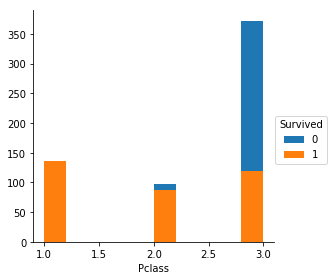

In [94]:
# 1)Plot Histogram for feature Pclass

sns.FacetGrid(df_train,hue='Survived',size=4).map(plt.hist,'Pclass').add_legend()    
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


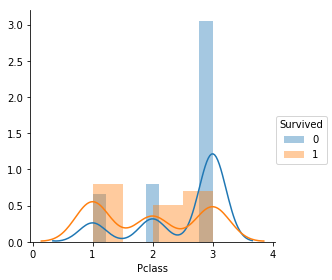

In [95]:
# 1)Plot Probability Density Function(PDF) for feature Pclass

sns.FacetGrid(df_train,hue='Survived',size=4).map(sns.distplot,'Pclass').add_legend()    
plt.show()

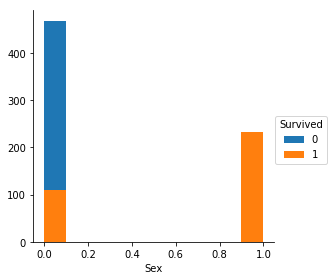

In [96]:
# 2)Plot of feature Sex

sns.FacetGrid(df_train,hue='Survived',size=4).map(plt.hist,'Sex').add_legend()    
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


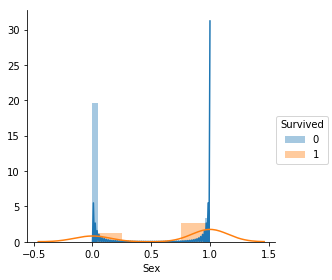

In [97]:
# 1)Plot Probability Density Function(PDF) for feature Sex

sns.FacetGrid(df_train,hue='Survived',size=4).map(sns.distplot,'Sex').add_legend()    
plt.show()

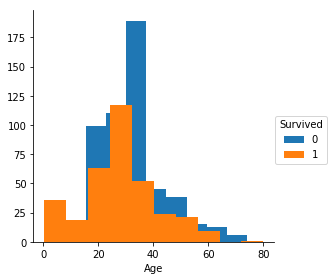

In [98]:
# 3)Plot of feature Age

sns.FacetGrid(df_train,hue='Survived',size=4).map(plt.hist,'Age').add_legend()    
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


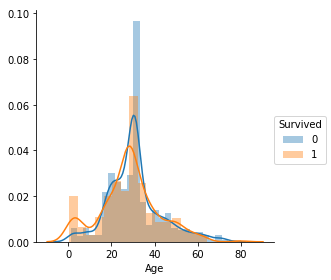

In [99]:
# 1)Plot Probability Density Function(PDF) for feature Age

sns.FacetGrid(df_train,hue='Survived',size=4).map(sns.distplot,'Age').add_legend()    
plt.show()

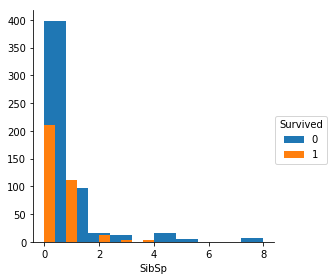

In [100]:
# 4)Plot of feature SibSp

sns.FacetGrid(df_train,hue='Survived',size=4).map(plt.hist,'SibSp').add_legend()    
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


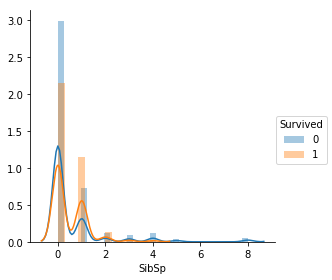

In [101]:
# 1)Plot Probability Density Function(PDF) for feature SibSp

sns.FacetGrid(df_train,hue='Survived',size=4).map(sns.distplot,'SibSp').add_legend()    
plt.show()

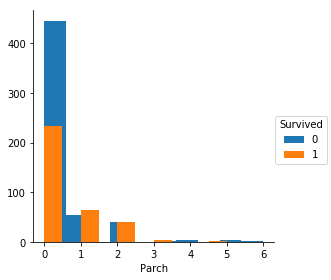

In [102]:
# 5)Plot of feature Parch

sns.FacetGrid(df_train,hue='Survived',size=4).map(plt.hist,'Parch').add_legend()    
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


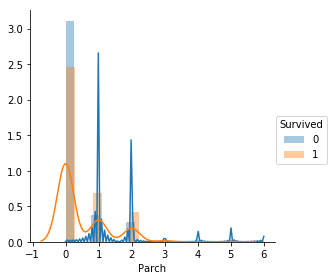

In [103]:
# 1)Plot Probability Density Function(PDF) for feature Parch

sns.FacetGrid(df_train,hue='Survived',size=4).map(sns.distplot,'Parch').add_legend()    
plt.show()

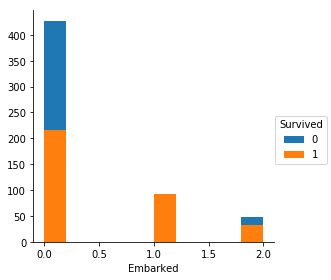

In [104]:
# 6)Plot of feature Embarked

sns.FacetGrid(df_train,hue='Survived',size=4).map(plt.hist,'Embarked').add_legend()    
plt.show()

C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\asus\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


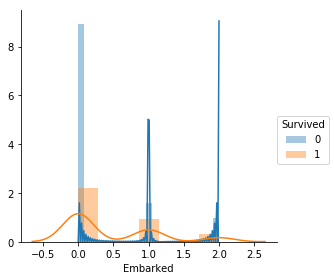

In [105]:
# 1)Plot Probability Density Function(PDF) for feature Embarked

sns.FacetGrid(df_train,hue='Survived',size=4).map(sns.distplot,'Embarked').add_legend()    
plt.show()

### Machine Learning

#### Feature Selection:

In this case study we are not dealing with strings so we remove the features with data type-String ie,Name,Cabin and Ticket

In [106]:
dtrain=df_train[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
dtest=df_test[['Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]

In [107]:
dtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,3,0,22.0,1,0,0,7.2500
1,1,1,38.0,1,0,1,71.2833
2,3,1,26.0,0,0,0,7.9250
3,1,1,35.0,1,0,0,53.1000
4,3,0,35.0,0,0,0,8.0500


In [108]:
dtest.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,3,0,34.5,0,0,2,7.8292
1,3,1,47.0,1,0,0,7.0000
2,2,0,62.0,0,0,2,9.6875
3,3,0,27.0,0,0,0,8.6625
4,3,1,22.0,1,1,0,12.2875


## Training the model using KNN(k nearest neighbor's) algorithm

In [109]:
from sklearn.neighbors import KNeighborsClassifier

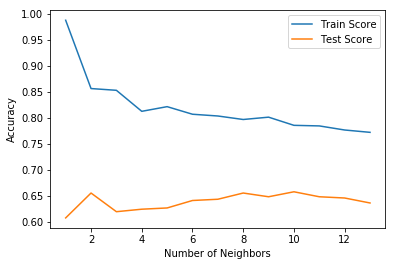

In [110]:
train_score=[]
test_score=[]
neighbors=range(1,14)
for n in neighbors :
    knn=KNeighborsClassifier(n_neighbors=n)
    knn.fit(dtrain,df_train['Survived'])
    train_score.append(knn.score(dtrain,df_train['Survived']))
    test_score.append(knn.score(dtest,df_test['Survived']))
plt.plot(neighbors,train_score,label='Train Score')
plt.plot(neighbors,test_score,label='Test Score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

### Observation

##### Here we can see from above that we get the best accuracy when k=10 for the test dataset

In [113]:
#By taking value of k=10 and checking accuracy on test dataset

knn=KNeighborsClassifier(10)
knn.fit(dtrain,df_train['Survived'])
print("Accuracy of our testing data set=",knn.score(dtest,df_test['Survived']))

Accuracy of our testing data set= 0.6578947368421053


## The accuracy on the test dataset=65.79% using KNN algorithm